In [1]:
# @hidden_cell
# The project token is an authorization token that is used to access project resources like data sources, connections, and used by platform APIs.
from project_lib import Project
project = Project(project_id='3d3e4b73-7dfe-4214-b1f6-c2ff248b3666', project_access_token='p-795f8a2044ebb42a4986172450f7ef9cdfe5cc49')
pc = project.project_context


In [4]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_09b3d805f4174d4a8f1bfb0d6f5561ce = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='DCE-9cE7s7JcI8hgkd0F3pGeeoBx1hvu0b-YOuq2afE5',
    ibm_auth_endpoint="https://iam.au-syd.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.ap-geo.objectstorage.service.networklayer.com')

# Your data file was loaded into a botocore.response.StreamingBody object.
# Please read the documentation of ibm_boto3 and pandas to learn more about the possibilities to load the data.
# ibm_boto3 documentation: https://ibm.github.io/ibm-cos-sdk-python/
# pandas documentation: http://pandas.pydata.org/
streaming_body_1 = client_09b3d805f4174d4a8f1bfb0d6f5561ce.get_object(Bucket='courseracapstone-donotdelete-pr-vcjkjqe40ayz2y', Key='NY_Cusine.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(streaming_body_1, "__iter__"): streaming_body_1.__iter__ = types.MethodType( __iter__, streaming_body_1 ) 


In [50]:
import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for data analsysis
from PIL import Image # converting images into arrays

#from project_lib import Project

#project= Project(sc,"<Project ID>", "<ProjectToken>")

%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

# install wordcloud
!conda install -c conda-forge wordcloud==1.4.1 --yes

# import package and its set of stopwords
from wordcloud import WordCloud, STOPWORDS

print ('Wordcloud is installed and imported!')

Matplotlib version:  3.0.2
Solving environment: done

# All requested packages already installed.

Wordcloud is installed and imported!


In [54]:
# Fetch the file
my_file = project.get_file("NY_Cusine.csv")

# Read the CSV data file from the object storage into a pandas DataFrame
my_file.seek(0)
import pandas as pd
NYC_CUISINE=pd.read_csv(my_file)
NYC_CUISINE

,Borough,Neighborhood,Cuisine
0,Bronx,Bedford Park,"Mexican, Puerto Rican, Dominican, Korean"
1,Bronx,Belmont,"Italian, Albanian"
2,Bronx,City Island,"Italian, Seafood"
3,Bronx,Morris Park,"Italian, Albanian"
4,Bronx,Norwood,Filipino
5,Bronx,Riverdale,Jewish
6,Bronx,South Bronx,"Puerto Rican, Dominican"
7,Bronx,Wakefield,"Jamaican, West Indian"
8,Bronx,Woodlawn,Irish
9,Queens,Astoria,"Greek, Italian, Eastern European, Brazilian, E..."


In [55]:
NYC_CUISINE.shape

(62, 3)

In [56]:
print(NYC_CUISINE.Borough.unique())

['Bronx' 'Queens' 'Brooklyn' 'Staten Island' 'Manhattan']


In [57]:
NYC_CUISINE['Borough'].value_counts().to_frame()

,Borough
Brooklyn,19
Queens,17
Manhattan,12
Bronx,9
Staten Island,5


 NEW YORK CITY CUISINE - WORD CLOUD

In [58]:
CUISINE_WC = NYC_CUISINE[['Cuisine']]
CUISINE_WC

,Cuisine
0,"Mexican, Puerto Rican, Dominican, Korean"
1,"Italian, Albanian"
2,"Italian, Seafood"
3,"Italian, Albanian"
4,Filipino
5,Jewish
6,"Puerto Rican, Dominican"
7,"Jamaican, West Indian"
8,Irish
9,"Greek, Italian, Eastern European, Brazilian, E..."


In [59]:
CUISINE_WC.to_csv('CUISINE_WC.txt', sep=',', index=False)

In [60]:
CUISINE_WC1 = open('CUISINE_WC.txt', 'r').read()

Use the stopwords that we imported from word_cloud. We use the function set to remove any redundant stopwords

In [61]:
stopwords = set(STOPWORDS)

In [62]:
# instantiate a word cloud object
NYC_CUISINE_WC = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)

# generate the word cloud
NYC_CUISINE_WC.generate(CUISINE_WC1)

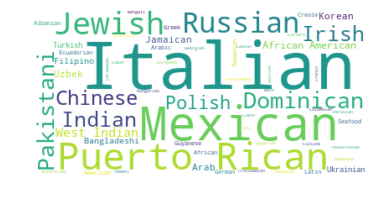

<Figure size 2160x3240 with 0 Axes>

In [64]:
# display the word cloud
plt.imshow(NYC_CUISINE_WC, interpolation='bilinear')
plt.axis('off')

fig = plt.figure()
fig.set_figwidth(30)
fig.set_figheight(45)

plt.show()

BROOKLYN CUISINE - WORD CLOUD

In [65]:
Brooklyn_data = NYC_CUISINE[NYC_CUISINE['Borough'] == 'Brooklyn'].reset_index(drop=True)
Brooklyn_data.head()

,Borough,Neighborhood,Cuisine
0,Brooklyn,Bay Ridge,"Irish, Italian, Greek, Turkish, Lebanese, Pale..."
1,Brooklyn,Bedford-Stuyvesant,"African-American, Jamaican, Trinidadian, Puert..."
2,Brooklyn,Bensonhurst,"Italian, Chinese, Turkish, Russian, Mexican, U..."
3,Brooklyn,Borough Park,"Jewish, Italian, Mexican, Chinese"
4,Brooklyn,Brighton Beach,"Russian, Georgian, Turkish, Pakistani and Ukra..."


In [66]:
BR_CUISINE_WC = Brooklyn_data[['Cuisine']]
BR_CUISINE_WC

,Cuisine
0,"Irish, Italian, Greek, Turkish, Lebanese, Pale..."
1,"African-American, Jamaican, Trinidadian, Puert..."
2,"Italian, Chinese, Turkish, Russian, Mexican, U..."
3,"Jewish, Italian, Mexican, Chinese"
4,"Russian, Georgian, Turkish, Pakistani and Ukra..."
5,"Puerto Rican, Mexican, Dominican, and Ecuadorian"
6,"Jamaican, West Indian, African-American"
7,Italian
8,"Jamaican, West Indian, and Jewish"
9,"African-American, Dominican, and Puerto Rican"


In [67]:
BR_CUISINE_WC.to_csv('BR_CUISINE.txt', sep=',', index=False)

In [68]:
BR_CUISINE_WC = open('BR_CUISINE.txt', 'r').read()

In [71]:
stopwords = set(STOPWORDS)

In [72]:
# instantiate a word cloud object
BR_CUISINE_NYC = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)

# generate the word cloud
BR_CUISINE_NYC.generate(BR_CUISINE_WC)

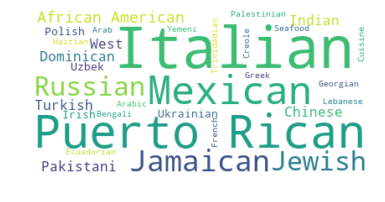

<Figure size 2160x3240 with 0 Axes>

In [74]:
# display the word cloud
plt.imshow(BR_CUISINE_NYC, interpolation='bilinear')
plt.axis('off')

fig = plt.figure()
fig.set_figwidth(30)
fig.set_figheight(45)

plt.show()

QUEENS CUISINE - WORD CLOUD

In [75]:
Queens_data = NYC_CUISINE[NYC_CUISINE['Borough'] == 'Queens'].reset_index(drop=True)
Queens_data.head()

,Borough,Neighborhood,Cuisine
0,Queens,Astoria,"Greek, Italian, Eastern European, Brazilian, E..."
1,Queens,Bellerose,Indian and Pakistani
2,Queens,Flushing,Chinese and Korean
3,Queens,Forest Hills,"Jewish, Russian and Uzbek"
4,Queens,Kew Gardens Hills,"Jewish, Russian and Uzbek"


In [76]:
Q_CUISINE_WC = Queens_data[['Cuisine']]
Q_CUISINE_WC

,Cuisine
0,"Greek, Italian, Eastern European, Brazilian, E..."
1,Indian and Pakistani
2,Chinese and Korean
3,"Jewish, Russian and Uzbek"
4,"Jewish, Russian and Uzbek"
5,"Jewish, Russian and Uzbek"
6,Italian
7,Italian
8,German and Polish
9,"Indian, Pakistani, Bangladeshi, Colombian, Ecu..."


In [77]:
Q_CUISINE_WC.to_csv('Q_CUISINE.txt', sep=',', index=False)

In [78]:
Q_CUISINE_WC = open('Q_CUISINE.txt', 'r').read()

In [79]:
stopwords = set(STOPWORDS)

In [80]:
# instantiate a word cloud object
Q_CUISINE_NYC = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)

# generate the word cloud
Q_CUISINE_NYC.generate(Q_CUISINE_WC)

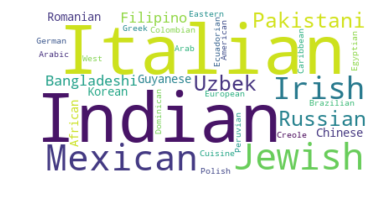

<Figure size 2160x3240 with 0 Axes>

In [81]:
# display the word cloud
plt.imshow(Q_CUISINE_NYC, interpolation='bilinear')
plt.axis('off')

fig = plt.figure()
fig.set_figwidth(30)
fig.set_figheight(45)

plt.show()

MANHATTAN CUISINE - WORD CLOUD

In [82]:
Manhattan_data = NYC_CUISINE[NYC_CUISINE['Borough'] == 'Manhattan'].reset_index(drop=True)
Manhattan_data.head()

,Borough,Neighborhood,Cuisine
0,Manhattan,Chinatown,Chinese and Vietnamese
1,Manhattan,East Harlem,"Puerto Rican, Mexican, Dominican, Chinese-Cub..."
2,Manhattan,East Village,"Japanese, Korean, Indian and Ukrainian"
3,Manhattan,Greenwich Village,Italian
4,Manhattan,Harlem,"Italian, African-American, Latin American, We..."


In [83]:
MN_CUISINE_WC = Manhattan_data[['Cuisine']]
MN_CUISINE_WC

,Cuisine
0,Chinese and Vietnamese
1,"Puerto Rican, Mexican, Dominican, Chinese-Cub..."
2,"Japanese, Korean, Indian and Ukrainian"
3,Italian
4,"Italian, African-American, Latin American, We..."
5,Korean
6,Australian
7,Italian
8,"Puerto Rican, Jewish, Italian, and Latin Amer..."
9,"Indian, Pakistani and Bangladeshi"


In [84]:
MN_CUISINE_WC.to_csv('MN_CUISINE.txt', sep=',', index=False)

MN_CUISINE_WC = open('MN_CUISINE.txt', 'r').read()

stopwords = set(STOPWORDS)

# instantiate a word cloud object
MN_CUISINE_NYC = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)

# generate the word cloud
MN_CUISINE_NYC.generate(MN_CUISINE_WC)

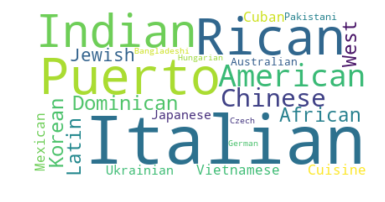

<Figure size 2160x3240 with 0 Axes>

In [85]:
# display the word cloud
plt.imshow(MN_CUISINE_NYC, interpolation='bilinear')
plt.axis('off')

fig = plt.figure()
fig.set_figwidth(30)
fig.set_figheight(45)

plt.show()

THE BRONX CUISINE - WORD CLOUD

In [86]:
Bronx_data = NYC_CUISINE[NYC_CUISINE['Borough'] == 'Bronx'].reset_index(drop=True)
Bronx_data.head()

,Borough,Neighborhood,Cuisine
0,Bronx,Bedford Park,"Mexican, Puerto Rican, Dominican, Korean"
1,Bronx,Belmont,"Italian, Albanian"
2,Bronx,City Island,"Italian, Seafood"
3,Bronx,Morris Park,"Italian, Albanian"
4,Bronx,Norwood,Filipino


In [87]:
BX_CUISINE_WC = Bronx_data[['Cuisine']]
BX_CUISINE_WC

,Cuisine
0,"Mexican, Puerto Rican, Dominican, Korean"
1,"Italian, Albanian"
2,"Italian, Seafood"
3,"Italian, Albanian"
4,Filipino
5,Jewish
6,"Puerto Rican, Dominican"
7,"Jamaican, West Indian"
8,Irish


In [88]:
BX_CUISINE_WC.to_csv('BX_CUISINE.txt', sep=',', index=False)

BX_CUISINE_WC = open('BX_CUISINE.txt', 'r').read()

stopwords = set(STOPWORDS)

# instantiate a word cloud object
BX_CUISINE_NYC = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)

# generate the word cloud
BX_CUISINE_NYC.generate(BX_CUISINE_WC)

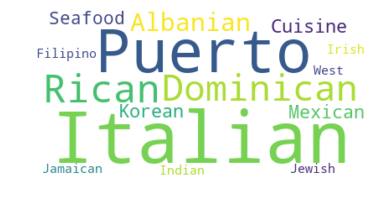

<Figure size 2160x3240 with 0 Axes>

In [89]:
# display the word cloud
plt.imshow(BX_CUISINE_NYC, interpolation='bilinear')
plt.axis('off')

fig = plt.figure()
fig.set_figwidth(30)
fig.set_figheight(45)

plt.show()

In [90]:
Staten_Island_data = NYC_CUISINE[NYC_CUISINE['Borough'] == 'Staten Island'].reset_index(drop=True)
Staten_Island_data.head()

,Borough,Neighborhood,Cuisine
0,Staten Island,Port Richmond,"Mexican, Indian, Italian"
1,Staten Island,Rossville,"Italian, Russian, Arab and Polish"
2,Staten Island,South Beach,"Italian, Russian, Arab and Polish"
3,Staten Island,Great Kills,"Italian, Russian, Arab and Polish"
4,Staten Island,Tompkinsville,"Italian, Sri Lankan, Pakistani, Indian"


In [91]:
SI_CUISINE_WC = Staten_Island_data[['Cuisine']]
SI_CUISINE_WC

,Cuisine
0,"Mexican, Indian, Italian"
1,"Italian, Russian, Arab and Polish"
2,"Italian, Russian, Arab and Polish"
3,"Italian, Russian, Arab and Polish"
4,"Italian, Sri Lankan, Pakistani, Indian"


In [92]:
SI_CUISINE_WC.to_csv('SI_CUISINE.txt', sep=',', index=False)

SI_CUISINE_WC = open('SI_CUISINE.txt', 'r').read()

stopwords = set(STOPWORDS)

# instantiate a word cloud object
SI_CUISINE_NYC = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)

# generate the word cloud
SI_CUISINE_NYC.generate(SI_CUISINE_WC)

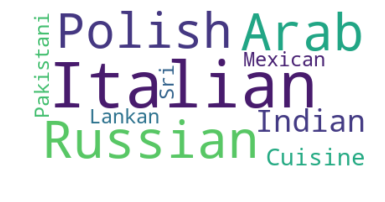

<Figure size 2160x3240 with 0 Axes>

In [93]:
# display the word cloud
plt.imshow(SI_CUISINE_NYC, interpolation='bilinear')
plt.axis('off')

fig = plt.figure()
fig.set_figwidth(30)
fig.set_figheight(45)

plt.show()